# <center>『 파이썬 머신러닝 완벽 가이드 』</center>

<img src="http://image.kyobobook.co.kr/images/book/large/928/l9791158391928.jpg">

---

# 3장. 평가

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#정확도(Accuracy)" data-toc-modified-id="정확도(Accuracy)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>정확도(Accuracy)</a></span></li><li><span><a href="#오차-행렬(COnfusion)" data-toc-modified-id="오차-행렬(COnfusion)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>오차 행렬(COnfusion)</a></span></li><li><span><a href="#정밀도(Precision)와-재현율(Recall)" data-toc-modified-id="정밀도(Precision)와-재현율(Recall)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>정밀도(Precision)와 재현율(Recall)</a></span><ul class="toc-item"><li><span><a href="#정밀도/재현율-트레이드오프" data-toc-modified-id="정밀도/재현율-트레이드오프-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>정밀도/재현율 트레이드오프</a></span></li><li><span><a href="#정밀도와-재현율의-맹점" data-toc-modified-id="정밀도와-재현율의-맹점-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>정밀도와 재현율의 맹점</a></span></li></ul></li><li><span><a href="#F1-스코어" data-toc-modified-id="F1-스코어-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>F1 스코어</a></span></li><li><span><a href="#ROC-곡선과-AUC" data-toc-modified-id="ROC-곡선과-AUC-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ROC 곡선과 AUC</a></span></li><li><span><a href="#피마-인디언-당뇨병-예측" data-toc-modified-id="피마-인디언-당뇨병-예측-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>피마 인디언 당뇨병 예측</a></span></li></ul></div>

--- 

머신러닝은 데이터 가공/변환, 모델 학습/예측, 그리고 **평가(Evaluation)**의 프로세스로 구성됩니다.  

머신러닝 모델은 여러 가지 방법으로 예측 성능을 평가할 수 있습니다. **성능 평가 지표(Evaluation Metric)**는 일반적으로 모델이 분류냐 회귀냐에 따라 여러 종류로 나뉩니다. **회귀**의 경우 대부분 실제값과 예측값의 오차 평균값에 기반합니다. **분류**의 평가 방법도 일반적으로는 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반하지만, 단순히 이러한 정확도만 가지고 판단했다가는 잘못된 평가 결과에 빠질 수 있습니다.  

본 장에서는 분류의 성능 평가 지표를 집중적으로 살펴보겠습니다.  
- 정확도(Accuracy)
- 오차행렬(Confusion Matrix)
- 정밀도(Precision)
- 재현율(Recall)
- F1 스코어
- ROC, AUC

## 정확도(Accuracy)

정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표입니다. 직관적으로 모델 예측 성능을 나타내는 평가 지표입니다. 이진 분류의 경우 데이터 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않습니다. 

titanic 예제에서 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 매우 단순한 Classifier입니다.

In [1]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit( ) 메소드는 아무것도 학습하지 않음. 
    def fit(self , X , y=None):
            pass
    
    # predict( ) 메소드는 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1 로 예측함. 
    def predict(self, X):
        pred = np.zeros( ( X.shape[0] , 1))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

이렇게 단순한 알고리즘으로 예측을 하더라도 데이터의 구성에 따라 정확도 결과는 약 78.77%로 꽤 높은 수치가 나올 수 있기에 정확도를 평가 지표로 사용할 때는 매우 신중해야 합니다.  
특히 정확도는 **불균형한(imbalanced) 레이블** 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아닙니다. 

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행. 
myclf = MyDummyClassifier()
myclf.fit(X_train ,y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test , mypredictions)))

Dummy Classifier의 정확도는: 0.7877


손글씨 숫자 MNIST 데이터셋에서 레이블이 7인 것만 True, 나머지 값은 모두 False로 변환해 이진 분류 문제로 바꿔보겠습니다. 마찬가지로 아무것도 하지 않고 무조건 특정한 결과로 찍어도 데이터 분포도가 균일하지 않은 경우 높은 수치가 나타날 수 있는 것이 정확도 평가 지표의 맹점입니다.

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros( (len(X),1) , dtype=bool)

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환. 
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [5]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


## 오차 행렬(COnfusion)

정확도가 가지는 분류 평가 지표로서 이러한 한계점을 극복하기 위해 여러 가지 분류 지표와 함께 적용해야합니다.  

먼저 **True/False, Positive/Negative의 4분면으로 구성되는 **오차 행렬(COnfusion)**에 대해 설명하겠습니다.  
TP, TN, FP, FN 값은 Classifier 성능의 여러 면모를 판단할 수 있는 기반 정보를 제공합니다. 이 값을 조합해 Classifier의 성능을 측정할 수 있는 주요 지표인 **정확도(Accuracy)**, **정밀도(Precision)**, **재현율(Recall)** 값을 알 수 있습니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb9IVyu%2FbtqH48uLrU5%2FJlaznfVZ4mo5kRw488loq1%2Fimg.png" width=50%>

사이킷런은 오차 행렬을 구하기 위해 confusion_matrix() API를 제공합니다.

In [6]:
from sklearn.metrics import confusion_matrix

위의 정확도 예제에서 모두 0으로 예측을 했기 때문에 다음과 같은 결과가 나타난 것입니다.

In [7]:
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

정확도는 분류 모델의 성능을 측정할 수 있는 한 가지 요소일 뿐입니다. 불균형한 데이터 세트에서 정확도보다 더 선호되는 평가 지표인 **정밀도**와 **재현율**에 대해 알아보겠습니다.

## 정밀도(Precision)와 재현율(Recall)

정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표입니다.  
- 정밀도 = TP / (FP + TP)
- 재현율 = TP / (FN + TP)

<img src="https://blog.kakaocdn.net/dn/S1z2M/btqvWpQKfvo/O2gB015AN6589ZBDuTBv71/img.png" width=50%>

**재현율이 중요 지표**인 경우는 **실제 Positive 양성 데이터를 Negative로 잘못 판단**하게 되면 업무상 큰 영향을 발생하는 경우입니다. 예를 들면 암 판단 모델은 재현율이 훨씬 중요한 지표입니다. 보험 사기와 같은 금융 사기 적발 모델도 재현율이 중요합니다.  
보통은 재현율이 정밀도보다 중요한 업무가 많지만, **정밀도가 더 중요한 지표**인 경우도 있습니다. 예를 들어 스펨 메일 여부를 판단하는 모델의 경우 **실제 Negative인 일반 메일을 Positive인 스팸 메일로 분류**할 경우에는 메일을 아예 받지 못하게 돼 업무에 차질이 생깁니다.

재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞추지만, **재현율은 FN을 낮추는 데, 정밀도는 FP를 낮추는 데 초점**을 맞춥니다. 이 같은 특성 때문에 재현율과 정밀도는 서로 보완적인 지표로 분류의 성능을 평가하는 데 적용됩니다. 가장 좋은 성능 평가는 **재현율과 정밀도 모두 높은 수치를 얻는 것**입니다. 반면에 둘 중 어느 한 평가 지표만 매우 높고, 다른 수치는 매우 낮은 결과를 나타내는 경우는 바람직하지 않습니다.

사이킷런은 정밀도 계산을 위해 precision_score()를, 재현율 계산을 위해 recall_score()를 API로 제공합니다.

In [8]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [9]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\Users\kmmnj\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 정밀도/재현율 트레이드오프

분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임계값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있습니다. 하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽습니다. 이를 **정밀도/재현율 트레이드오프(Trade-off)**라고 부릅니다.

사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()를 제공합니다.

In [10]:
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46162417 0.53837583]
 [0.87858538 0.12141462]
 [0.87723741 0.12276259]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46162417 0.53837583 1.        ]
 [0.87858538 0.12141462 0.        ]
 [0.87723741 0.12276259 0.        ]]


사이킷런은 분류 결정 임곗값을 조절해 정밀도와 재현율 성능 수치를 상호 보완적으로 조정할 수 있습니다. 사이킷런은 **precision_recall_curve() API**를 제공합니다.

In [11]:
from sklearn.metrics import precision_recall_curve

추출된 임곗값 샘플 10개에 해당하는 정밀도 값과 재현율 값을 살펴보면 임곗값이 증가할수록 정밀도 값은 동시에 높아지나 재현율 값은 낮아짐을 알 수 있습니다.

In [12]:
# 레이블 값이 1일때의 예측 확률을 추출 
# Positive 칼럼의 예측 확률 배열
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (143,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


precision_recall_curve() API는 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태의 그래프로 시각화하는 데 이용할 수 있습니다.

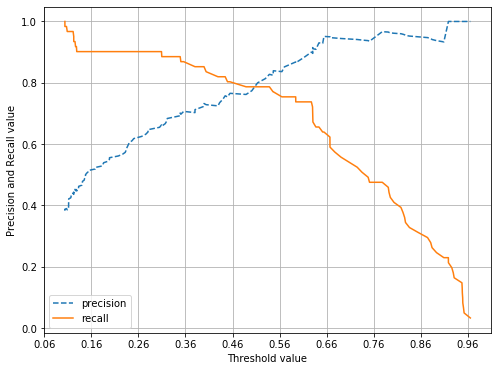

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

**ex. 정밀도 값을 90%로 맞추고 싶다면?**  
http://egloos.zum.com/dreamtamer/v/7322037

### 정밀도와 재현율의 맹점

Positive 예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경됩니다. 임곗값의 이러한 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용돼야 합니다. 그렇지 않고 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용돼서는 안됩니다.

## F1 스코어

**F1 스코어**는 **정밀도와 재현율을 결합**한 지표입니다.  
만일 A 예측 모델의 경우 정밀도가 0.9, 재현율이 0.1로 극단적인 차이가 나고, B 예측 모델은 정밀도가 0.5, 재현율이 0.5로 정밀도와 재현율이 큰 차이가 없다면 A 예측 모델보다 B 예측 모델이 더 높은 F1 스코어를 가지게 됩니다.

<img src="https://images.deepai.org/user-content/9954225913-thumb-4901.svg">

In [14]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import Binarizer

In [15]:
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


In [16]:
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

다음은 임곗값 0.4 ~ 0.6 별로 정확도, 정밀도, 재현율, F1 스코어를 출력한 결과입니다.

In [17]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361, F1:0.7786
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1:0.7840
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1:0.7805
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1:0.7931
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1:0.8036


## ROC 곡선과 AUC

ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능에서 중요하게 사용되는 지표입니다.  

**ROC 곡선(Receiver Operation Characteristic Curve)**은 우리말로 수신자 판단 곡선으로 불립니다. 일반적으로 의학 분야에서 많이 사용되지만, 머신러닝의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표이기도 합니다.  

ROC 곡선은 **FPR(False Positive Rate)**이 변할 때 **TPR(True Positive Rate)**이 어떻게 변하는지를 나타내는 곡선입니다. FPR을 X축으로, TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타납니다. **TPR은 재현율**을 나타냅니다. 즉, **민감도**라고도 부릅니다. 그리고 민감도에 대응하는 지표로 **TNR(True Negative Rate)**이라고 불리는 **특이성**이 있습니다. FPR은 1 - TNR로 나타낼 수 있습니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbgHBQQ%2FbtqHWvSPYhF%2F9CITKubNzFK74nQ7Uj1990%2Fimg.png" width=40%>

ROC 곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것이며, 멀어질수록 성능이 뛰어난 것입니다.

사이킷런은 RCO 곡선을 구하기 위해 roc_curve() API를 제공합니다. 사용법은 precision_recall_curve() API와 유사합니다. 단지 반환값이 FPR, TPR, 임곗값으로 구성돼 있을 뿐입니다.

In [18]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50]
샘플용 10개의 임곗값:  [1.97 0.75 0.63 0.59 0.49 0.4  0.31 0.15 0.12 0.11 0.1 ]
샘플 임곗값별 FPR:  [0.    0.017 0.034 0.059 0.127 0.161 0.237 0.483 0.61  0.703 0.814]
샘플 임곗값별 TPR:  [0.    0.475 0.672 0.754 0.787 0.852 0.885 0.902 0.934 0.967 0.984]


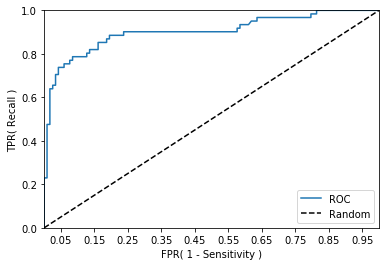

In [19]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는 데 이용하며 분류의 성능 지표로 사용되는 것은 ROC 곡선 면정에 기반한 AUC 값으로 결정합니다. AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치입니다. ACU 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건입니다.

In [20]:
from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8341


<img src="https://blog.kakaocdn.net/dn/bYn3WQ/btqUsd5egLk/ByNLSwBuOgISZuUCkMuxE1/img.png">

## 피마 인디언 당뇨병 예측

In [21]:
# pass